# Ciencia de datos 2021

# Factoración no negativa de matrices (NNMF)

En este experimento ilustramos cómo funciona un sistema de recomendación (*toy example*).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import NMF

## Data

In [2]:
X1 = np.array([[0,1,0,1,2,2],
               [2,3,1,1,2,2],
               [1,1,1,0,1,1],
               [0,2,3,4,1,1],
               [0,0,0,0,1,0]])

X2 = np.array([[0,1,0,1,2,2],
               [2,3,0,1,2,2],
               [1,1,0,0,1,1],
               [0,2,3,4,1,1],
               [0,0,0,0,1,0],
               [0,0,2,0,2,2],
               [2,1,0,2,0,1],
               [0,3,1,1,1,0],
               [0,3,2,2,1,0]])

## Experimento 1

In [3]:
D1 = pd.DataFrame(X1, columns=['Alina', 'Babá', 'Cadú', 'Didí', 'Edú', 'Fabi'])
D1.index = ['Vegetales', 'Frutas', 'Dulces', 'Pan', 'Café']

In [4]:
D1

,Alina,Babá,Cadú,Didí,Edú,Fabi
Vegetales,0,1,0,1,2,2
Frutas,2,3,1,1,2,2
Dulces,1,1,1,0,1,1
Pan,0,2,3,4,1,1
Café,0,0,0,0,1,0


In [5]:
k = 3            # número de clústers

nmf = NMF(k)     # NNMF
nmf.fit(D1)      # training u optimización

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=3, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [6]:
H = nmf.components_
W = nmf.transform(D1)
print(W. shape, H.shape)

(5, 3) (3, 6)


In [7]:
W = pd.DataFrame(np.round(W, 4), columns=np.arange(0, k))
W.index = D1.index

In [8]:
W

,0,1,2
Vegetales,0.0030,0.0372,2.7447
Frutas,1.9272,0.1525,0.4676
Dulces,0.9736,0.0003,0.0000
Pan,0.0003,2.6569,1.1803
Café,0.0000,0.0000,0.5900


In [9]:
# mostramos W con mapa de colores

WW = W.style.background_gradient(cmap=plt.cm.Blues)
display(WW)

,0,1,2
Vegetales,0.003000,0.037200,2.744700
Frutas,1.927200,0.152500,0.467600
Dulces,0.973600,0.000300,0.000000
Pan,0.000300,2.656900,1.180300
Café,0.000000,0.000000,0.590000


In [10]:
display(W.T.corr().style.background_gradient(cmap=plt.cm.seismic))

,Vegetales,Frutas,Dulces,Pan,Café
Vegetales,1.000000,-0.359096,-0.509614,-0.053474,0.999941
Frutas,-0.359096,1.000000,0.986015,-0.912763,-0.348930
Dulces,-0.509614,0.986015,1.000000,-0.831921,-0.500231
Pan,-0.053474,-0.912763,-0.831921,1.000000,-0.064326
Café,0.999941,-0.348930,-0.500231,-0.064326,1.000000


In [12]:
H = pd.DataFrame(np.round(nmf.components_, 3), columns=D1.columns)
#H.index = ['Veggies', 'Meat lovers', 'Bread eaters', 'Yogurth pickers']
H.index = ['Fruits pickers', 'Bread eaters',  'Veggies']

In [13]:
HH = H.style.background_gradient(cmap=plt.cm.Blues)
display(HH)

,Alina,Babá,Cadú,Didí,Edú,Fabi
Fruits pickers,1.036000,1.344000,0.551000,0.263000,0.885000,0.898000
Bread eaters,0.000000,0.602000,1.124000,1.359000,0.034000,0.068000
Veggies,0.000000,0.347000,0.000000,0.337000,0.767000,0.691000


## Experimento 2

In [14]:
D2 = pd.DataFrame(X2, columns=['Alina', 'Babá', 'Cadú', 'Didí', 'Edú', 'Fabi'])
D2.index = ['Vegetales', 'Frutas', 'Dulces', 'Pan', 'Café', 'Carnes', 'Lácteos', 'Pastas', 'Salsa']

In [15]:
D2

,Alina,Babá,Cadú,Didí,Edú,Fabi
Vegetales,0,1,0,1,2,2
Frutas,2,3,0,1,2,2
Dulces,1,1,0,0,1,1
Pan,0,2,3,4,1,1
Café,0,0,0,0,1,0
Carnes,0,0,2,0,2,2
Lácteos,2,1,0,2,0,1
Pastas,0,3,1,1,1,0
Salsa,0,3,2,2,1,0


In [16]:
k = 7
nmf = NMF(k)
nmf.fit(D2)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [17]:
H = nmf.components_
W = nmf.transform(D2)
print(W. shape, H.shape)

(9, 7) (7, 6)


In [18]:
W = pd.DataFrame(np.round(W, 4), columns=np.arange(0, k))
W.index = D2.index

In [19]:
W

,0,1,2,3,4,5,6
Vegetales,0.0000,3.8265,0.0000,0.6400,0.3554,0.0011,0.0000
Frutas,0.0000,1.9336,1.1514,0.6009,0.2516,0.0000,2.2767
Dulces,0.0023,0.9751,0.1790,0.3989,0.0000,0.0000,1.1410
Pan,4.5012,1.5662,0.3687,0.1100,1.3427,0.1622,0.0000
Café,0.0000,0.0000,0.0000,0.5729,0.0000,0.0000,0.0000
Carnes,0.0024,0.0032,0.0000,1.1266,0.0000,1.8708,0.0000
Lácteos,0.0000,0.0014,0.0000,0.0000,0.7109,0.0022,2.2753
Pastas,1.5924,0.0000,2.0157,0.0092,0.1574,0.0000,0.0000
Salsa,3.1848,0.0000,1.7111,0.0286,0.5241,0.0000,0.0000


In [20]:
WW = W.style.background_gradient(cmap=plt.cm.Blues)
display(WW)

,0,1,2,3,4,5,6
Vegetales,0.000000,3.826500,0.000000,0.640000,0.355400,0.001100,0.000000
Frutas,0.000000,1.933600,1.151400,0.600900,0.251600,0.000000,2.276700
Dulces,0.002300,0.975100,0.179000,0.398900,0.000000,0.000000,1.141000
Pan,4.501200,1.566200,0.368700,0.110000,1.342700,0.162200,0.000000
Café,0.000000,0.000000,0.000000,0.572900,0.000000,0.000000,0.000000
Carnes,0.002400,0.003200,0.000000,1.126600,0.000000,1.870800,0.000000
Lácteos,0.000000,0.001400,0.000000,0.000000,0.710900,0.002200,2.275300
Pastas,1.592400,0.000000,2.015700,0.009200,0.157400,0.000000,0.000000
Salsa,3.184800,0.000000,1.711100,0.028600,0.524100,0.000000,0.000000


In [21]:
display(W.T.corr().style.background_gradient(cmap=plt.cm.seismic))

,Vegetales,Frutas,Dulces,Pan,Café,Carnes,Lácteos,Pastas,Salsa
Vegetales,1.000000,0.459370,0.521548,0.073469,-0.015372,-0.207624,-0.249346,-0.344257,-0.341643
Frutas,0.459370,1.000000,0.941915,-0.368895,-0.136450,-0.468035,0.568127,-0.202514,-0.396661
Dulces,0.521548,0.941915,1.000000,-0.312170,0.012496,-0.318392,0.581098,-0.427616,-0.495851
Pan,0.073469,-0.368895,-0.312170,1.000000,-0.286001,-0.410794,-0.300984,0.449449,0.793563
Café,-0.015372,-0.136450,0.012496,-0.286001,1.000000,0.403866,-0.219799,-0.267279,-0.268383
Carnes,-0.207624,-0.468035,-0.318392,-0.410794,0.403866,1.000000,-0.326488,-0.401658,-0.408115
Lácteos,-0.249346,0.568127,0.581098,-0.300984,-0.219799,-0.326488,1.000000,-0.333715,-0.308615
Pastas,-0.344257,-0.202514,-0.427616,0.449449,-0.267279,-0.401658,-0.333715,1.000000,0.876491
Salsa,-0.341643,-0.396661,-0.495851,0.793563,-0.268383,-0.408115,-0.308615,0.876491,1.000000


In [22]:
H = pd.DataFrame(np.round(H, 4), columns=D2.columns)
#H.index = ['Veggies', 'Meat lovers', 'Bread eaters', 'Yogurth pickers']
#H.index = ['Fruits pickers', 'Bread eaters',  'Veggies']
#H.index = ['Veggies', 'Meat lovers', 'Bread eaters', 'Yogurth pickers']
#H.index = ['Veggies', 'Meat lovers', 'Bread eaters', 'Yogurth pickers']
H.index = ['Italians', 'Fruit pickers', 'Meat lovers', 'Yogurth pickers', 'Bread eaters', 'Veggies', '?']

In [23]:
HH = H.T.style.background_gradient(cmap=plt.cm.Blues)
display(HH)

,Italians,Fruit pickers,Meat lovers,Yogurth pickers,Bread eaters,Veggies,?
Alina,0.000000,0.000000,0.000000,0.000000,0.000300,0.000000,0.878400
Babá,0.247300,0.261700,1.292900,0.001300,0.000000,0.000000,0.441200
Cadú,0.628000,0.000000,0.000000,0.000000,0.000000,1.068200,0.000000
Didí,0.028700,0.000000,0.253800,0.000000,2.813400,0.000000,0.000000
Edú,0.062700,0.230700,0.438600,1.745600,0.000000,0.017400,0.000000
Fabi,0.000000,0.521400,0.000000,0.000000,0.007500,1.068300,0.434800


<Figure size 432x288 with 0 Axes>

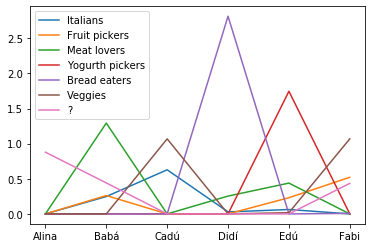

In [24]:
plt.figure()
#plt.imshow(H, cmap=plt.cm.jet)
H.T.plot()
plt.show()

In [25]:
approX = W.values @ H.values
reconstructed = pd.DataFrame(np.round(approX, 3), columns=D2.columns)
reconstructed.index = D2.index

In [26]:
# Sistema de recomendación

display(reconstructed)

,Alina,Babá,Cadú,Didí,Edú,Fabi
Vegetales,0.000,1.002,0.001,1.000,2.0,1.999
Frutas,2.000,3.000,0.000,1.000,2.0,2.000
Dulces,1.002,0.991,0.001,0.045,1.0,1.005
Pan,0.000,2.000,3.000,4.000,1.0,1.000
Café,0.000,0.001,0.000,0.000,1.0,0.000
Carnes,0.000,0.003,2.000,0.000,2.0,2.000
Lácteos,1.999,1.004,0.002,2.000,0.0,0.998
Pastas,0.000,3.000,1.000,1.000,1.0,0.001
Salsa,0.000,3.000,2.000,2.000,1.0,0.004


## Error en función de k

In [27]:
Hs = []
Ws = []
Xs = []
errs = []

for k in range(1, 1+D2.shape[1]):
    nmf = NMF(k)
    nmf.fit(D2)
    H = nmf.components_
    W = nmf.transform(D2)
    X = W @ H
    err = ((D2.values - X)**2).sum()
    
    Hs.append(H)
    Ws.append(W)
    Xs.append(X)
    errs.append(err)

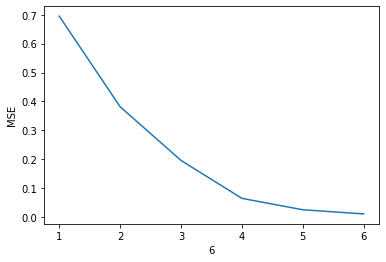

In [28]:
plt.figure()
plt.plot(np.arange(1,1+D2.shape[1]), errs /np.prod(D2.shape))
plt.xlabel(k)
plt.ylabel('MSE')
plt.show()

In [29]:
k = 6
nmf = NMF(k)
nmf.fit(D2)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=6, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [30]:
H = nmf.components_
W = nmf.transform(D2)
print(W. shape, H.shape)

(9, 6) (6, 6)
